In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Load Data

In [2]:


# Load the DataFrame from the CSV file
df = pd.read_csv('Data/output/df_cleaned.csv')



In [3]:
df.isna().sum()

job_title_short          0
job_title                0
job_location             0
job_via                  0
job_schedule_type        0
job_work_from_home       0
search_location          0
job_posted_date          0
job_no_degree_mention    0
job_health_insurance     0
job_country              0
salary_year_avg          0
company_name             0
job_skills               0
job_type_skills          0
num_jobs                 0
latitude                 0
longitude                0
dtype: int64

In [4]:
import ast
# Assuming df is your DataFrame with a column named 'job_skills'

# Data Cleaning: Remove duplicates and standardize skills to lowercase
def clean_skills(skills):
    try:
        skills_list = ast.literal_eval(skills)
        return list(set([skill.lower() for skill in skills_list]))
    except (ValueError, SyntaxError):
        return []

df['job_skills'] = df['job_skills'].apply(clean_skills)




In [5]:
df.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_year_avg', 'company_name', 'job_skills',
       'job_type_skills', 'num_jobs', 'latitude', 'longitude'],
      dtype='object')

In [6]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['job_title', 'job_type_skills', 'job_no_degree_mention', 
                   'job_health_insurance','job_location', 'company_name', 'search_location', 'job_via', 'job_country'
                   ]

df = df.drop(columns=columns_to_drop)

In [7]:
df.sample(5)

,job_title_short,job_schedule_type,job_work_from_home,job_posted_date,salary_year_avg,job_skills,num_jobs,latitude,longitude
536080,Data Scientist,Full-time,False,2023-12-16 22:28:45,127533.929333,[linux],1,25.500000,51.250000
349961,Data Engineer,Full-time,False,2023-05-15 00:00:15,138023.587920,"[scala, mysql, aws, snowflake, java, python, a...",1,16.000000,30.000000
401203,Data Engineer,Full-time,False,2023-03-21 11:48:08,116865.000000,[],1,28.500000,-10.000000
206919,Data Analyst,Full-time,False,2023-01-13 09:04:41,98227.331003,"[tableau, matplotlib]",1,-14.604722,-57.656111
695168,Machine Learning Engineer,Full-time,False,2023-09-26 18:17:14,140967.250000,"[python, azure, databricks]",1,39.694444,-8.130556


In [8]:
df.isna().sum()

job_title_short       0
job_schedule_type     0
job_work_from_home    0
job_posted_date       0
salary_year_avg       0
job_skills            0
num_jobs              0
latitude              0
longitude             0
dtype: int64

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_encoded = pd.DataFrame(mlb.fit_transform(df['job_skills']), columns=mlb.classes_, index=df.index)

# Concatenate the encoded skills back to the original DataFrame
df_final = pd.concat([df, df_encoded], axis=1)

# Drop the original 'job_skills' column if no longer needed
df = df_final.drop('job_skills', axis=1)


In [10]:
df.columns

Index(['job_title_short', 'job_schedule_type', 'job_work_from_home',
       'job_posted_date', 'salary_year_avg', 'num_jobs', 'latitude',
       'longitude', 'airflow', 'airtable',
       ...
       'wimi', 'windows', 'wire', 'word', 'workfront', 'wrike', 'wsl',
       'xamarin', 'yarn', 'zoom'],
      dtype='object', length=260)

In [11]:
from sklearn.preprocessing import LabelEncoder
df_1 = df.copy()
# Example for Label Encoding categorical columns
label_cols = ['job_schedule_type']
label_encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df_1[col] = label_encoders[col].fit_transform(df_1[col])





# Handling boolean columns (if not already 0/1)
boolean_cols = ['job_work_from_home']
df_1[boolean_cols] = df_1[boolean_cols].astype(int)

# Handling date column by extracting features
df_1['job_posted_date'] = pd.to_datetime(df_1['job_posted_date'])




# Now df is ready for a machine learning model


In [12]:
df_1.columns

Index(['job_title_short', 'job_schedule_type', 'job_work_from_home',
       'job_posted_date', 'salary_year_avg', 'num_jobs', 'latitude',
       'longitude', 'airflow', 'airtable',
       ...
       'wimi', 'windows', 'wire', 'word', 'workfront', 'wrike', 'wsl',
       'xamarin', 'yarn', 'zoom'],
      dtype='object', length=260)

In [13]:
from sklearn.preprocessing import StandardScaler

# Example for Label Encoding categorical columns
label_cols = ['job_schedule_type']
label_encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# One-Hot Encoding categorical columns
df = pd.get_dummies(df, columns=['job_title_short'], drop_first=True)

# Scaling numerical columns
scaler = StandardScaler()
df[['salary_year_avg', 'num_jobs', 'latitude', 'longitude']] = scaler.fit_transform(df[['salary_year_avg', 'num_jobs', 'latitude', 'longitude']])

# Handling boolean columns (if not already 0/1)
boolean_cols = ['job_work_from_home']
df[boolean_cols] = df[boolean_cols].astype(int)

# Handling date column by extracting features
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['posted_year'] = df['job_posted_date'].dt.year
df['posted_month'] = df['job_posted_date'].dt.month
df['posted_day'] = df['job_posted_date'].dt.day

# Drop the original date column if you don’t need it anymore
df = df.drop(columns=['job_posted_date'])

# Now df is ready for a machine learning model


In [14]:
df.columns

Index(['job_schedule_type', 'job_work_from_home', 'salary_year_avg',
       'num_jobs', 'latitude', 'longitude', 'airflow', 'airtable', 'alteryx',
       'angular',
       ...
       'zoom', 'job_title_short_Cloud Engineer',
       'job_title_short_Data Analyst', 'job_title_short_Data Engineer',
       'job_title_short_Data Scientist',
       'job_title_short_Machine Learning Engineer',
       'job_title_short_Software Engineer', 'posted_year', 'posted_month',
       'posted_day'],
      dtype='object', length=267)

In [15]:
df_1.columns

Index(['job_title_short', 'job_schedule_type', 'job_work_from_home',
       'job_posted_date', 'salary_year_avg', 'num_jobs', 'latitude',
       'longitude', 'airflow', 'airtable',
       ...
       'wimi', 'windows', 'wire', 'word', 'workfront', 'wrike', 'wsl',
       'xamarin', 'yarn', 'zoom'],
      dtype='object', length=260)

In [16]:
df_1.shape

(746413, 260)

C:\Users\reetu\AppData\Local\Temp\ipykernel_30812\3954144971.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_1.groupby(['job_title_short', pd.Grouper(key='job_posted_date', freq='M')])['num_jobs'].sum().reset_index()


Processing Business Analyst


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Evaluation for Business Analyst:
MSE: 281373.3706784604
R-squared: -1.3279350478171303
MAE: 454.93542947845464


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\reetu\AppData\Local\Temp\ipykernel_30812\3954144971.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarni

Processing Cloud Engineer
Evaluation for Cloud Engineer:
MSE: 19324.975973569206
R-squared: -2.785087785900388
MAE: 119.61878401451266


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\reetu\AppData\Local\Temp\ipykernel_30812\3954144971.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarni

Processing Data Analyst
Evaluation for Data Analyst:
MSE: 2527208.274723571
R-squared: -0.6411122994929326
MAE: 1303.0247408526095


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\reetu\AppData\Local\Temp\ipykernel_30812\3954144971.py:53: FutureWarning: 'M' is deprecated and will be 

Processing Data Engineer
Evaluation for Data Engineer:
MSE: 2081968.329634689
R-squared: -0.3171088680853864
MAE: 988.8225239708881


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\reetu\AppData\Local\Temp\ipykernel_30812\3954144971.py:53: FutureWarning: 'M' is deprecated and will be 

Processing Data Scientist
Evaluation for Data Scientist:
MSE: 2808547.4579398627
R-squared: -0.933000772029349
MAE: 1144.6822692232975


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\reetu\AppData\Local\Temp\ipykernel_30812\3954144971.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarni

Processing Machine Learning Engineer
Evaluation for Machine Learning Engineer:
MSE: 17007.49618506456
R-squared: -4.2145351797227315
MAE: 122.06380652354558


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\reetu\AppData\Local\Temp\ipykernel_30812\3954144971.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarni

Processing Software Engineer
Evaluation for Software Engineer:
MSE: 534425.0179797006
R-squared: -11.329660349901578
MAE: 701.6986185655018


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\reetu\AppData\Local\Temp\ipykernel_30812\3954144971.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')


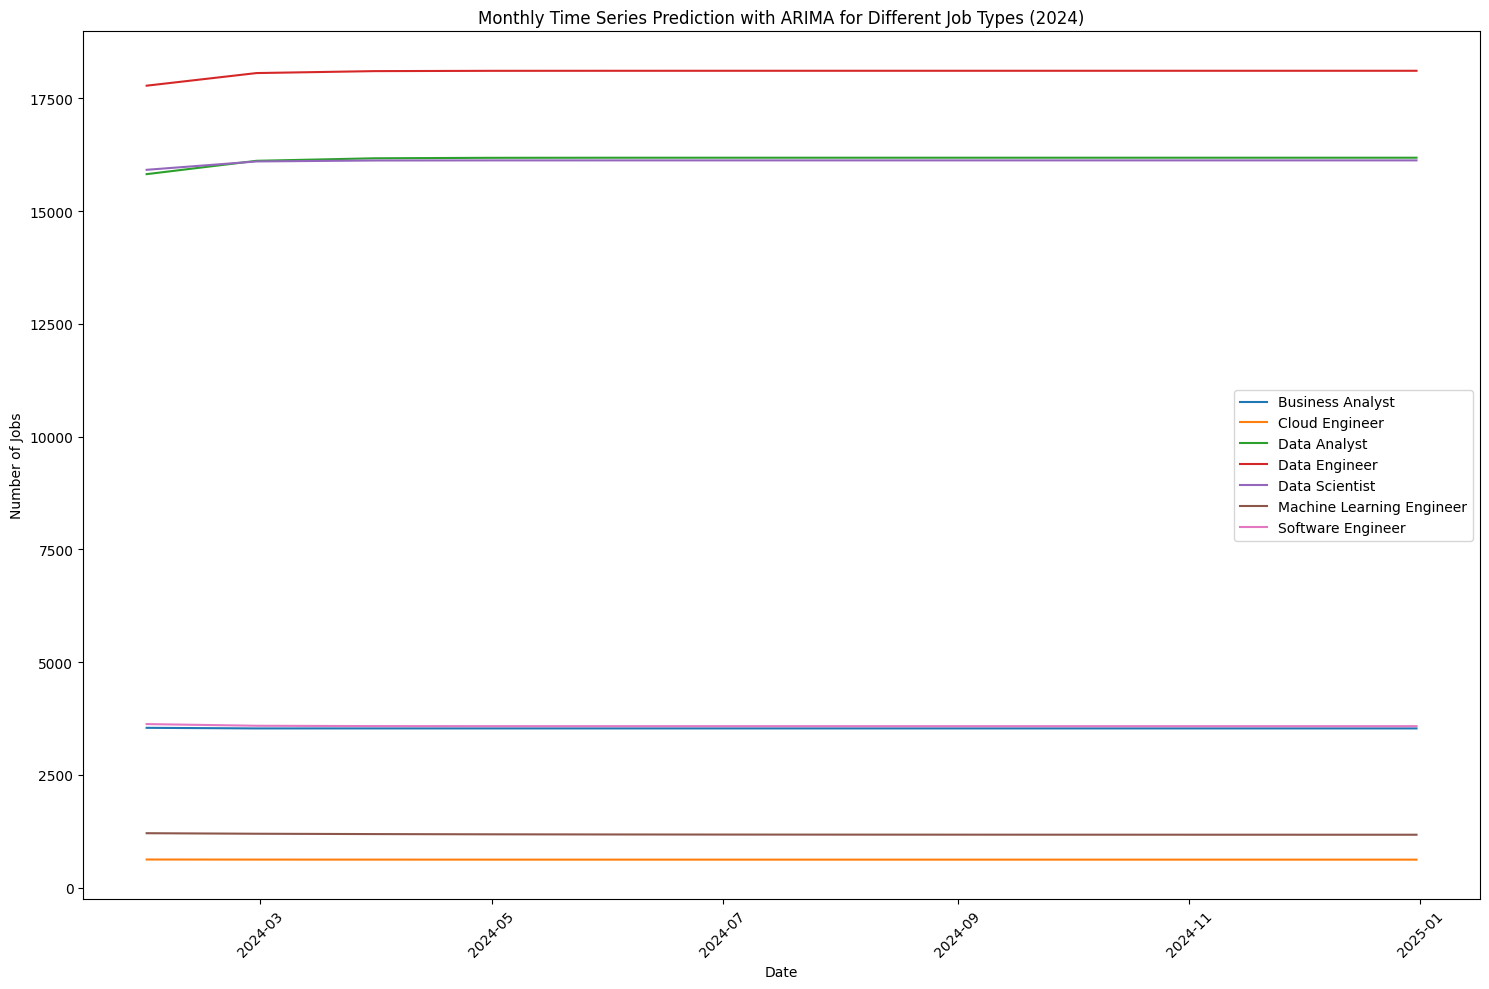


Predicted values for Business Analyst (Jan 2024 to Dec 2024):
2024-01-31    3543.675576
2024-02-29    3530.188847
2024-03-31    3530.704595
2024-04-30    3530.684873
2024-05-31    3530.685627
2024-06-30    3530.685598
2024-07-31    3530.685599
2024-08-31    3530.685599
2024-09-30    3530.685599
2024-10-31    3530.685599
2024-11-30    3530.685599
2024-12-31    3530.685599
Freq: ME, Name: predicted_mean, dtype: float64

Predicted values for Cloud Engineer (Jan 2024 to Dec 2024):
2024-01-31    624.063914
2024-02-29    622.448045
2024-03-31    621.784688
2024-04-30    621.512362
2024-05-31    621.400564
2024-06-30    621.354669
2024-07-31    621.335827
2024-08-31    621.328092
2024-09-30    621.324917
2024-10-31    621.323613
2024-11-30    621.323078
2024-12-31    621.322858
Freq: ME, Name: predicted_mean, dtype: float64

Predicted values for Data Analyst (Jan 2024 to Dec 2024):
2024-01-31    15818.780175
2024-02-29    16114.569392
2024-03-31    16170.268632
2024-04-30    16180.757199
202

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming df_1 is your original dataframe
# Convert 'job_posted_date' to datetime if not already
df_1['job_posted_date'] = pd.to_datetime(df_1['job_posted_date'])

# Aggregate num_jobs per month for each job type
df_monthly = df_1.groupby(['job_title_short', pd.Grouper(key='job_posted_date', freq='M')])['num_jobs'].sum().reset_index()
df_monthly.set_index(['job_title_short', 'job_posted_date'], inplace=True)

predictions_by_job_type = {}

# Define the month ranges for training and testing
train_end_date = pd.Timestamp('2023-09-30')
test_start_date = pd.Timestamp('2023-10-01')

for job_type in df_monthly.index.get_level_values(0).unique():
    print(f"Processing {job_type}")
    
    # Filter data for the current job type
    job_data = df_monthly.loc[job_type]['num_jobs']
    
    # Split into training and testing data
    train_data = job_data[:train_end_date]
    test_data = job_data[test_start_date:]
    
    # Fit ARIMA model
    model = ARIMA(train_data, order=(1,1,1))  # Simple ARIMA model
    results = model.fit()
    
    # Make predictions for the test period
    predictions = results.forecast(steps=len(test_data))
    
    # Calculate metrics
    mse = mean_squared_error(test_data, predictions)
    r2 = r2_score(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    
    print(f"Evaluation for {job_type}:")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")
    print(f"MAE: {mae}")
    
    # Refit on all data and forecast for 2024
    full_model = ARIMA(job_data, order=(1,1,1))
    full_results = full_model.fit()
    
    # Make predictions for the next 12 months (2024)
    future_dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
    future_predictions = full_results.forecast(steps=12)
    
    predictions_by_job_type[job_type] = future_predictions

# Plot the results
plt.figure(figsize=(15, 10))
for job_type, predictions in predictions_by_job_type.items():
    plt.plot(future_dates, predictions, label=job_type)

plt.legend()
plt.title('Monthly Time Series Prediction with ARIMA for Different Job Types (2024)')
plt.xlabel('Date')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print predictions
for job_type, predictions in predictions_by_job_type.items():
    print(f"\nPredicted values for {job_type} (Jan 2024 to Dec 2024):")
    print(predictions)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

def evaluate_model(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mse, rmse, mae, r2, mape

# Assuming df_monthly is your aggregated monthly data
for job_type in df_monthly.index.get_level_values(0).unique():
    print(f"\nProcessing {job_type}")
    
    job_data = df_monthly.loc[job_type]['num_jobs']
    
    if len(job_data) < 24:  # Require at least 2 years of data
        print(f"Insufficient data for {job_type}. Skipping.")
        continue
    
    # Use the last 3 months as test data
    train_data = job_data[:-3]
    test_data = job_data[-3:]
    
    # Fit ARIMA model
    try:
        model = ARIMA(train_data, order=(1,1,1))
        results = model.fit()
        
        # Make predictions for the test period
        predictions = results.forecast(steps=len(test_data))
        
        # Calculate evaluation metrics
        mse, rmse, mae, r2, mape = evaluate_model(test_data, predictions)
        
        print(f"Evaluation for {job_type}:")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"R-squared: {r2:.2f}")
        print(f"Mean Absolute Percentage Error: {mape:.2f}%")
        
        # Plot actual vs predicted
        plt.figure(figsize=(12, 6))
        plt.plot(test_data.index, test_data, label='Actual')
        plt.plot(test_data.index, predictions, label='Predicted')
        plt.title(f'Actual vs Predicted - {job_type}')
        plt.xlabel('Date')
        plt.ylabel('Number of Jobs')
        plt.legend()
        plt.show()
        
        # Residual analysis
        residuals = test_data - predictions
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plt.plot(test_data.index, residuals)
        plt.title('Residuals Over Time')
        plt.xlabel('Date')
        plt.ylabel('Residual')
        
        plt.subplot(122)
        from scipy import stats
        stats.probplot(residuals, dist="norm", plot=plt)
        plt.title("Normal Q-Q Plot")
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error processing {job_type}: {str(e)}")

# If you have enough data for cross-validation, you can add this part
if len(job_data) >= 60:  # Assuming we need at least 5 years of data for cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = []

    for train_index, test_index in tscv.split(job_data):
        train, test = job_data.iloc[train_index], job_data.iloc[test_index]
        model = ARIMA(train, order=(1,1,1))
        results = model.fit()
        predictions = results.forecast(steps=len(test))
        mse = mean_squared_error(test, predictions)
        cv_scores.append(mse)

    print(f"Cross-validation MSE scores: {cv_scores}")
    print(f"Average MSE: {np.mean(cv_scores):.2f}")
else:
    print("Insufficient data for cross-validation.")
    


Processing Business Analyst
Insufficient data for Business Analyst. Skipping.

Processing Cloud Engineer
Insufficient data for Cloud Engineer. Skipping.

Processing Data Analyst
Insufficient data for Data Analyst. Skipping.

Processing Data Engineer
Insufficient data for Data Engineer. Skipping.

Processing Data Scientist
Insufficient data for Data Scientist. Skipping.

Processing Machine Learning Engineer
Insufficient data for Machine Learning Engineer. Skipping.

Processing Software Engineer
Insufficient data for Software Engineer. Skipping.
Insufficient data for cross-validation.


job_title_short
Business Analyst             12
Cloud Engineer               12
Data Analyst                 12
Data Engineer                12
Data Scientist               12
Machine Learning Engineer    12
Software Engineer            12
dtype: int64


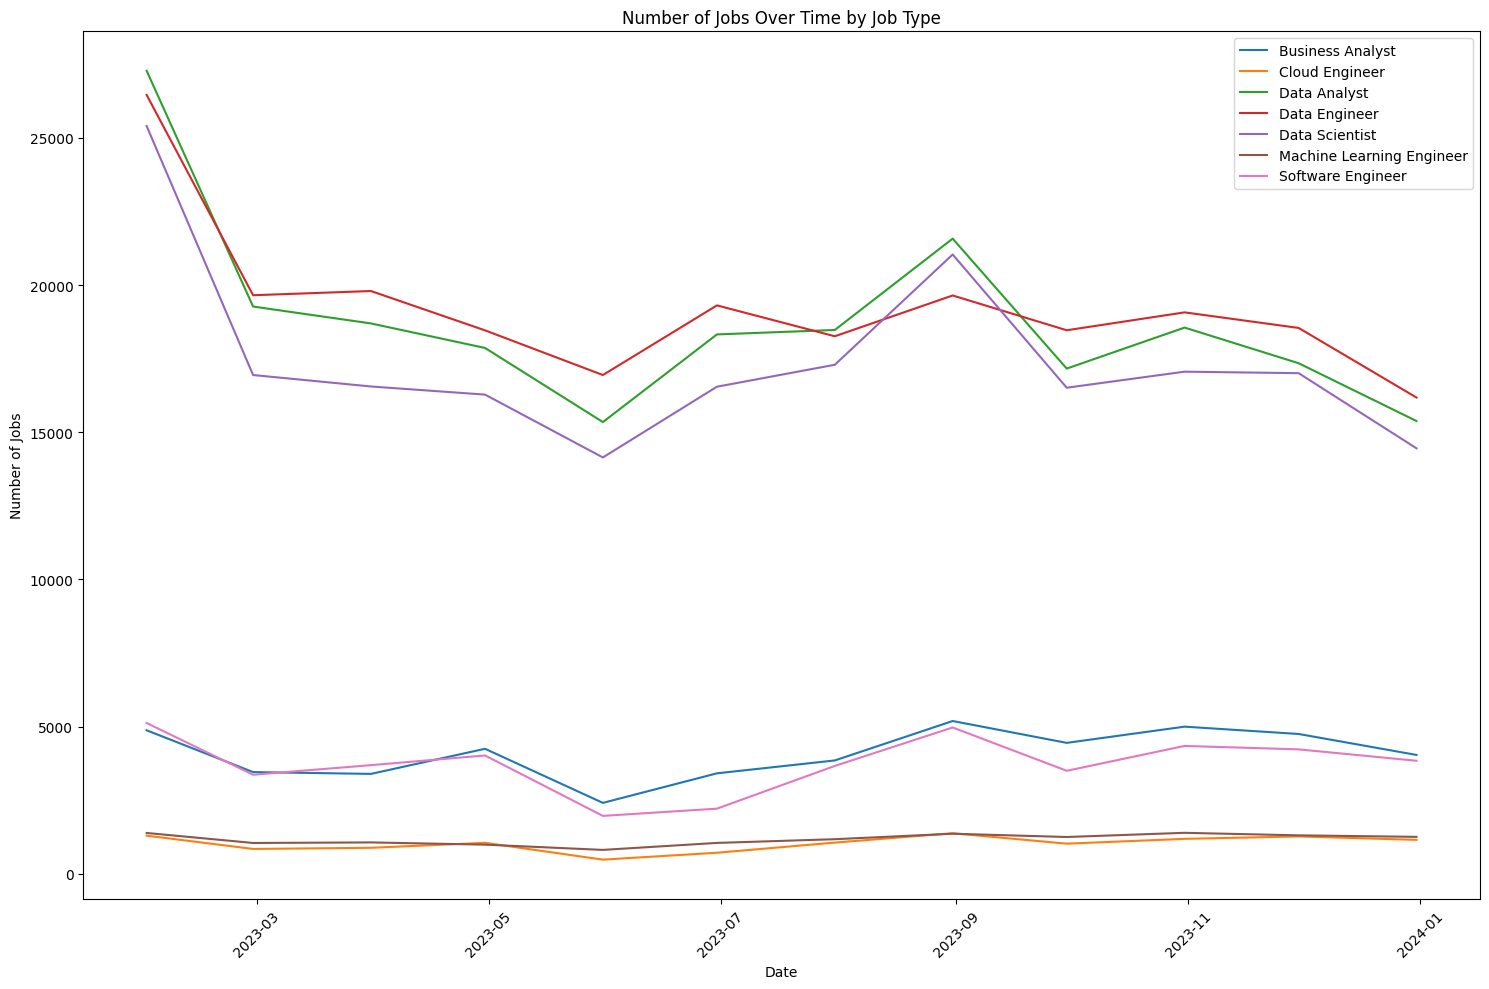

                           count          mean          std      min  \
job_title_short                                                        
Business Analyst            12.0   4088.083333   824.205674   2408.0   
Cloud Engineer              12.0   1027.416667   260.592492    480.0   
Data Analyst                12.0  18773.416667  3155.844778  15346.0   
Data Engineer               12.0  19233.166667  2524.425581  16179.0   
Data Scientist              12.0  17436.416667  3023.344279  14144.0   
Machine Learning Engineer   12.0   1173.166667   182.393597    811.0   
Software Engineer           12.0   3742.666667   943.899776   1966.0   

                                25%      50%       75%      max  
job_title_short                                                  
Business Analyst            3443.50   4141.5   4780.25   5189.0  
Cloud Engineer               872.25   1055.0   1206.50   1377.0  
Data Analyst               17299.50  18399.5  18840.50  27281.0  
Data Engineer        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_monthly is your aggregated monthly data
print(df_monthly.groupby(level=0).size())

# Plot the available data for each job type
fig, ax = plt.subplots(figsize=(15, 10))

for job_type in df_monthly.index.get_level_values(0).unique():
    job_data = df_monthly.loc[job_type]['num_jobs']
    ax.plot(job_data.index, job_data.values, label=job_type)

ax.set_title('Number of Jobs Over Time by Job Type')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Jobs')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print(df_monthly.groupby(level=0)['num_jobs'].describe())


Analyzing trend for Business Analyst
Number of data points: 12
Trend slope: 82.06


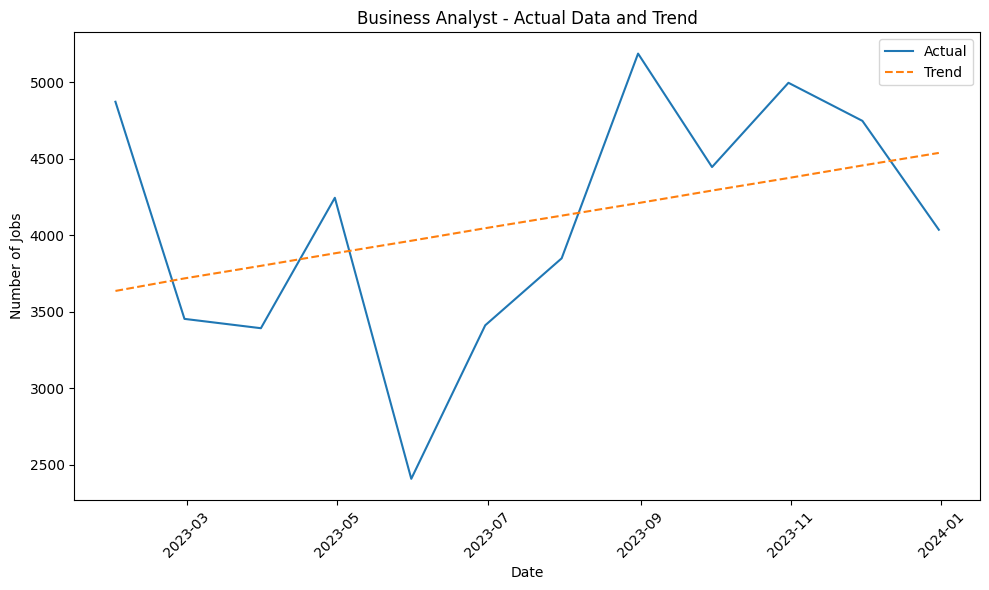


Analyzing trend for Cloud Engineer
Number of data points: 12
Trend slope: 25.42


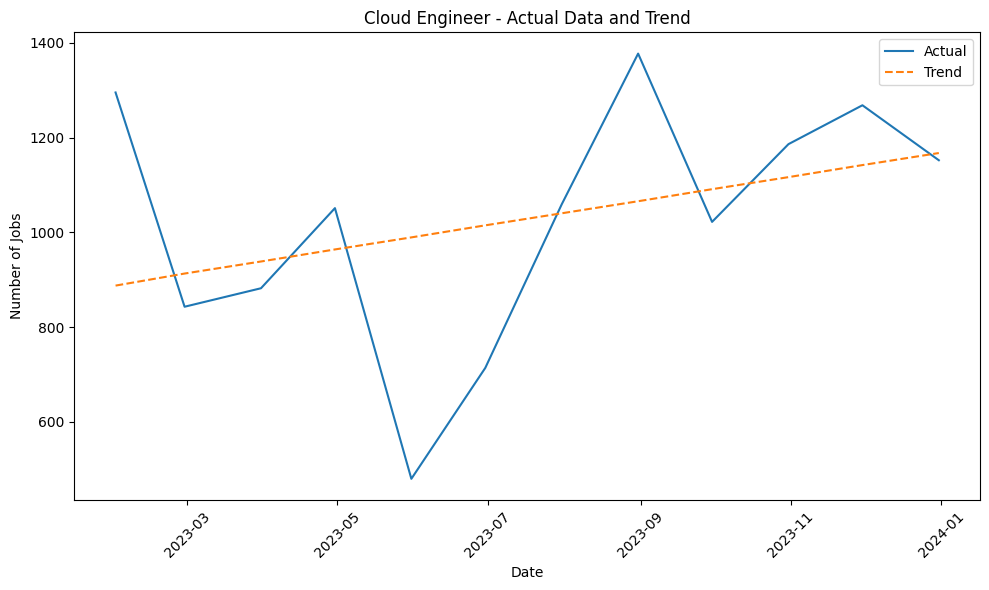


Analyzing trend for Data Analyst
Number of data points: 12
Trend slope: -468.11


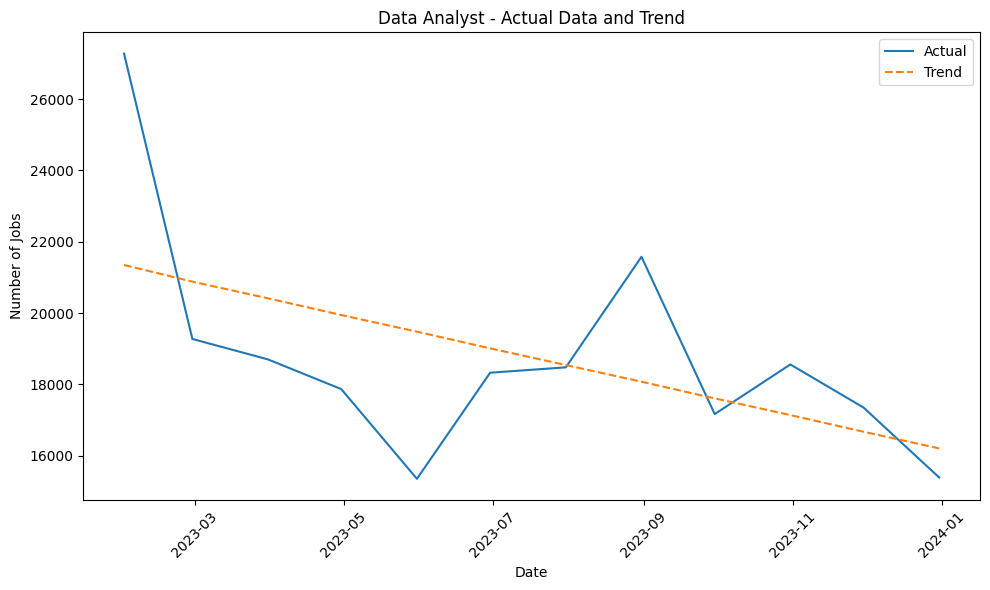


Analyzing trend for Data Engineer
Number of data points: 12
Trend slope: -423.39


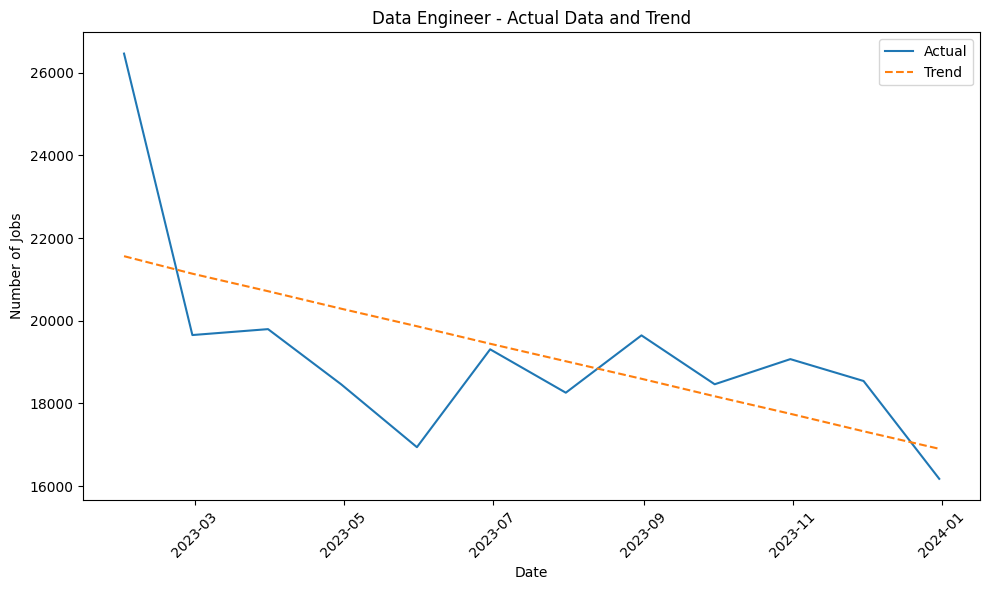


Analyzing trend for Data Scientist
Number of data points: 12
Trend slope: -327.84


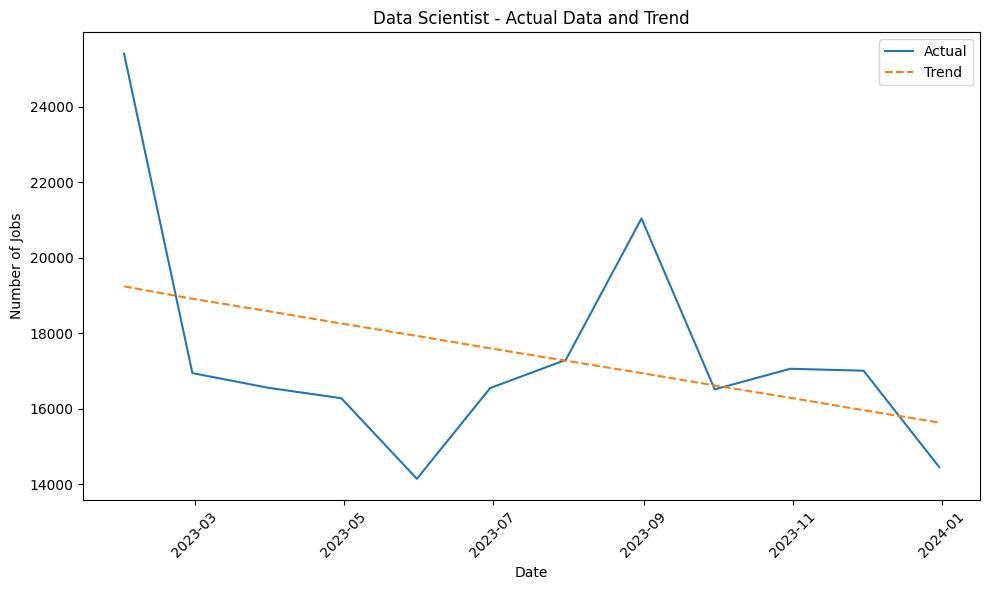


Analyzing trend for Machine Learning Engineer
Number of data points: 12
Trend slope: 21.80


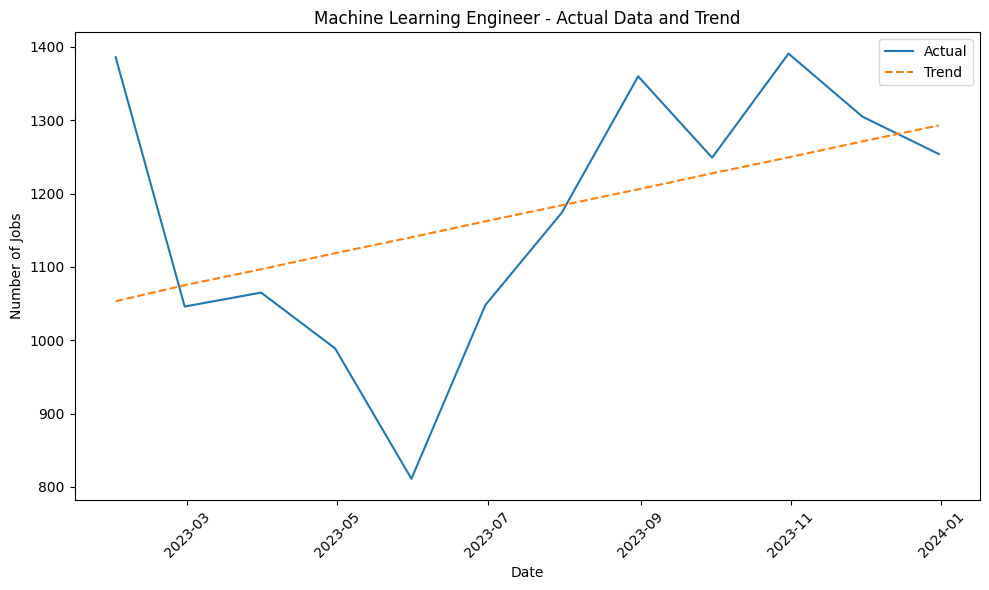


Analyzing trend for Software Engineer
Number of data points: 12
Trend slope: 21.24


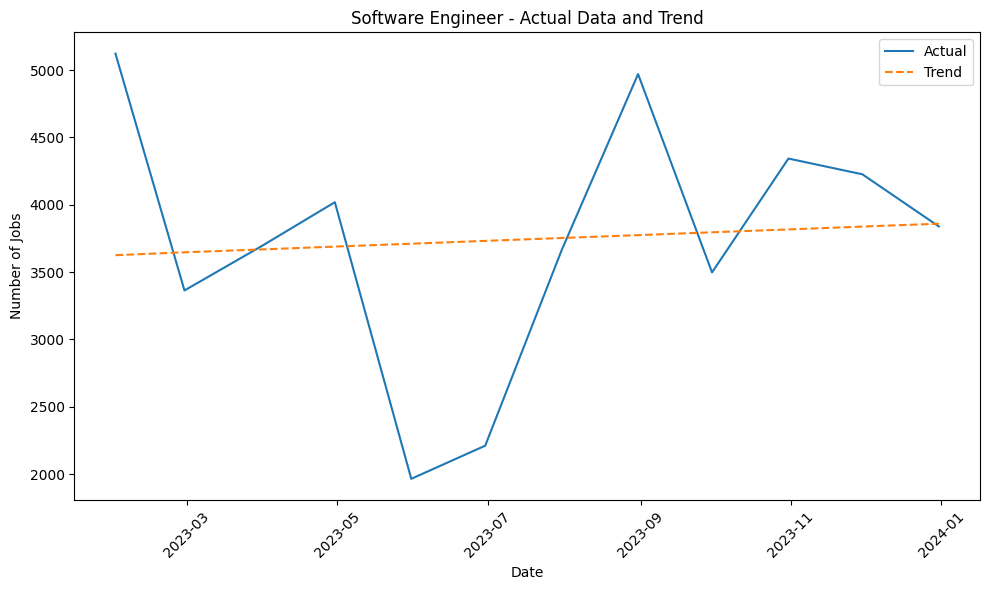

In [ ]:
import numpy as np

for job_type in df_monthly.index.get_level_values(0).unique():
    job_data = df_monthly.loc[job_type]['num_jobs']
    
    print(f"\nAnalyzing trend for {job_type}")
    print(f"Number of data points: {len(job_data)}")
    
    if len(job_data) < 2:
        print(f"Insufficient data for {job_type}. Skipping.")
        continue
    
    # Calculate simple trend
    trend = np.polyfit(range(len(job_data)), job_data.values, 1)
    trend_line = np.poly1d(trend)
    
    print(f"Trend slope: {trend[0]:.2f}")
    
    # Plot the data and trend line
    plt.figure(figsize=(10, 6))
    plt.plot(job_data.index, job_data.values, label='Actual')
    plt.plot(job_data.index, trend_line(range(len(job_data))), '--', label='Trend')
    plt.title(f'{job_type} - Actual Data and Trend')
    plt.xlabel('Date')
    plt.ylabel('Number of Jobs')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\reetu\AppData\Local\Temp\ipykernel_26112\293449139.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=prediction_months+1, freq='M')[1:]
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

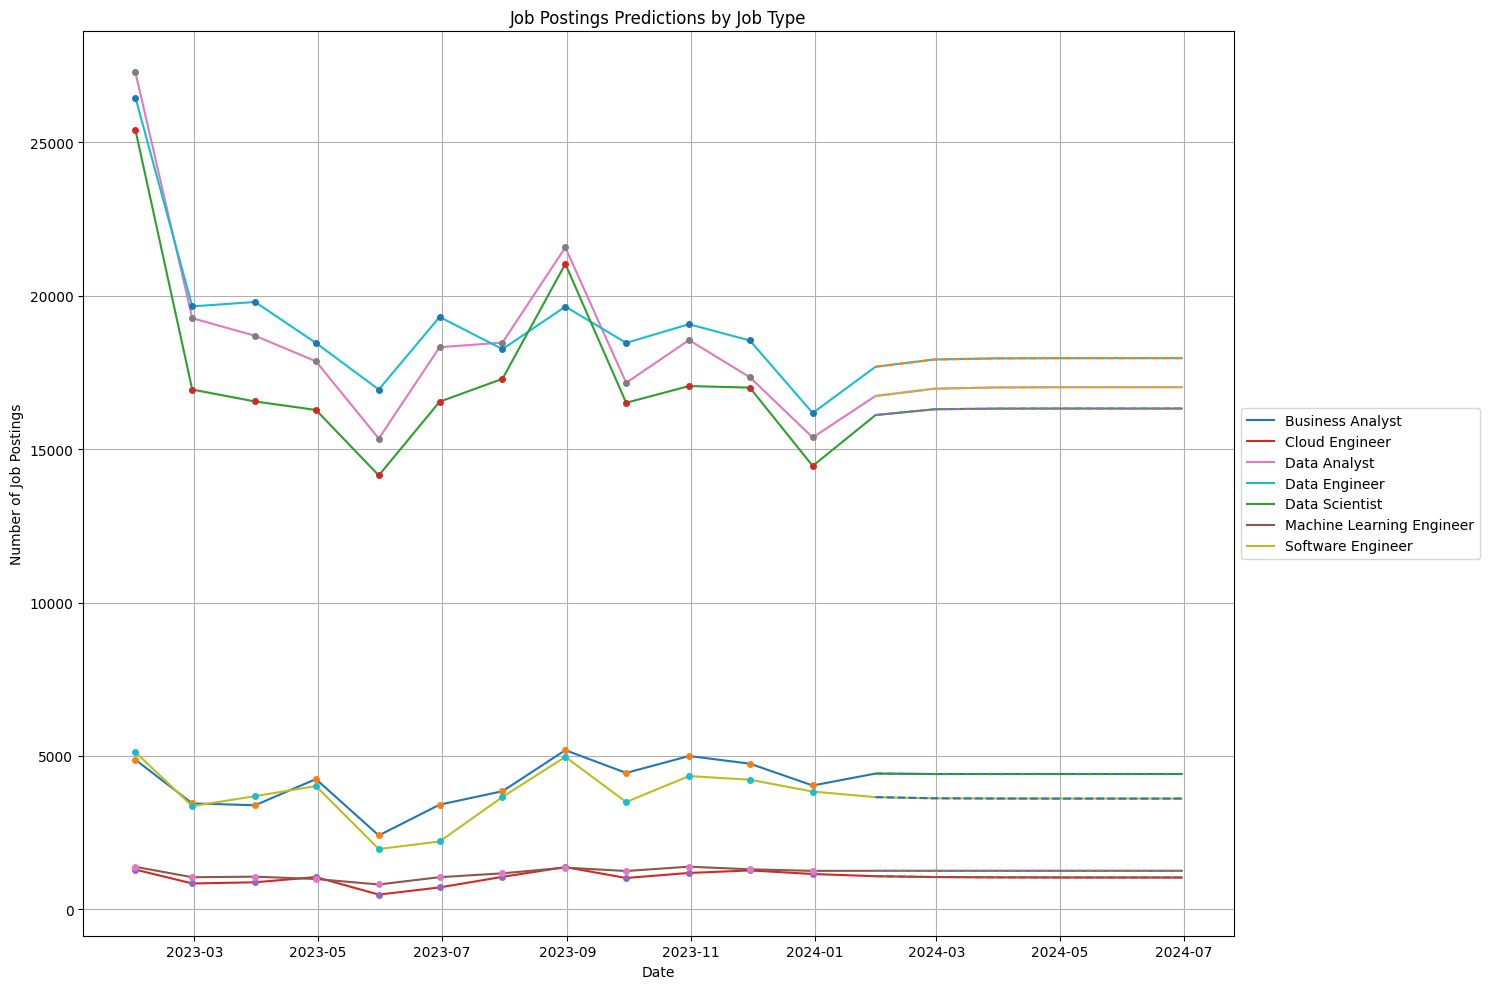

d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information 


Predicted values for Business Analyst:
2024-01: 4426.23
2024-02: 4410.84
2024-03: 4411.45
2024-04: 4411.43
2024-05: 4411.43
2024-06: 4411.43

Predicted values for Cloud Engineer:
2024-01: 1079.71
2024-02: 1052.85
2024-03: 1042.87
2024-04: 1039.16
2024-05: 1037.79
2024-06: 1037.27

Predicted values for Data Analyst:
2024-01: 16735.02
2024-02: 16971.52
2024-03: 17012.83
2024-04: 17020.04
2024-05: 17021.30
2024-06: 17021.52

Predicted values for Data Engineer:
2024-01: 17687.53
2024-02: 17923.67
2024-03: 17960.64
2024-04: 17966.43
2024-05: 17967.33
2024-06: 17967.48

Predicted values for Data Scientist:
2024-01: 16112.53
2024-02: 16301.32
2024-03: 16322.81
2024-04: 16325.25
2024-05: 16325.53
2024-06: 16325.56

Predicted values for Machine Learning Engineer:
2024-01: 1256.28
2024-02: 1255.21
2024-03: 1255.71
2024-04: 1255.48
2024-05: 1255.59
2024-06: 1255.53

Predicted values for Software Engineer:
2024-01: 3657.11
2024-02: 3619.84
2024-03: 3612.20
2024-04: 3610.64
2024-05: 3610.32
2024-0

d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_monthly is your aggregated monthly data
prediction_months = 6  # Number of months to predict

plt.figure(figsize=(15, 10))

for job_type in df_monthly.index.get_level_values(0).unique():
    job_data = df_monthly.loc[job_type]['num_jobs']
    
    if len(job_data) < 3:  # Need at least 3 data points for ARIMA(1,1,1)
        print(f"Insufficient data for {job_type}. Skipping.")
        continue
    
    try:
        # Fit ARIMA model
        model = ARIMA(job_data, order=(1,1,1))  # Simple ARIMA model
        results = model.fit()
        
        # Make predictions
        predictions = results.forecast(steps=prediction_months)
        
        # Create future dates for predictions, starting from the last actual data point
        last_date = job_data.index[-1]
        future_dates = pd.date_range(start=last_date, periods=prediction_months+1, freq='M')[1:]
        
        # Combine actual data and predictions for a seamless plot
        combined_dates = job_data.index.union(future_dates)
        combined_values = np.concatenate([job_data.values, predictions.values])
        
        # Plot actual data and predictions
        plt.plot(combined_dates, combined_values, label=f'{job_type}')
        plt.plot(job_data.index, job_data.values, 'o', markersize=4)  # Markers for actual data points
        plt.plot(future_dates, predictions.values, '--')  # Dashed line for predictions
        
    except Exception as e:
        print(f"Error processing {job_type}: {str(e)}")

plt.title('Job Postings Predictions by Job Type')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.grid(True)
plt.show()

# Print out the predicted values
for job_type in df_monthly.index.get_level_values(0).unique():
    job_data = df_monthly.loc[job_type]['num_jobs']
    
    if len(job_data) < 3:
        continue
    
    try:
        model = ARIMA(job_data, order=(1,1,1))
        results = model.fit()
        predictions = results.forecast(steps=prediction_months)
        
        print(f"\nPredicted values for {job_type}:")
        for date, value in zip(future_dates, predictions):
            print(f"{date.strftime('%Y-%m')}: {value:.2f}")
    except Exception as e:
        print(f"Error processing {job_type}: {str(e)}")

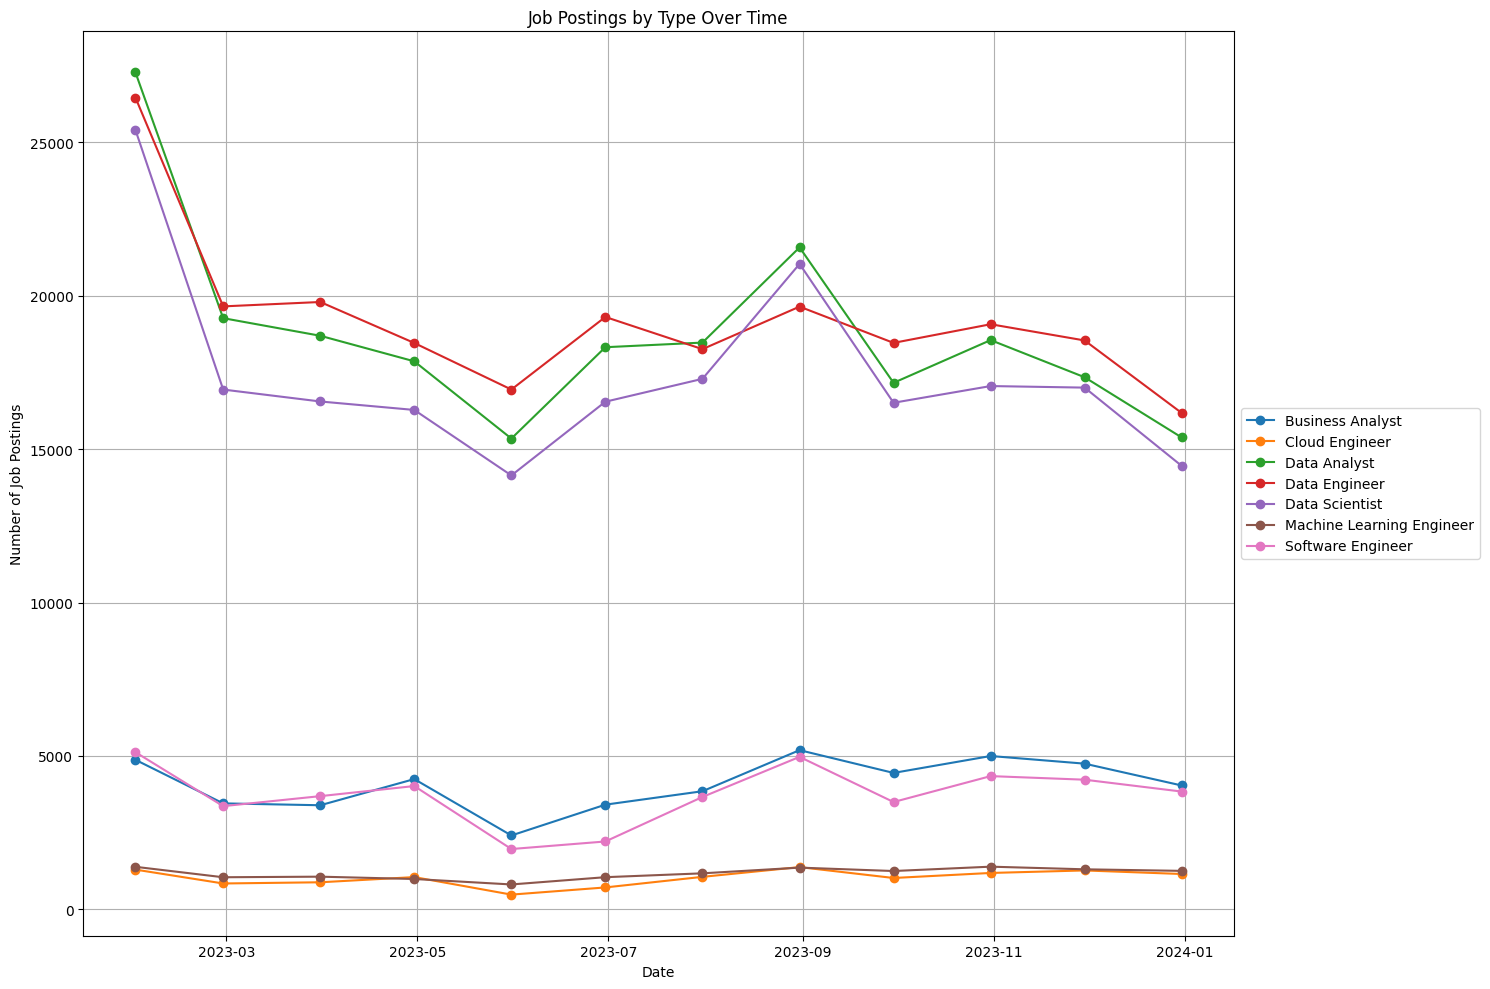

                           count          mean          std      min  \
job_title_short                                                        
Business Analyst            12.0   4088.083333   824.205674   2408.0   
Cloud Engineer              12.0   1027.416667   260.592492    480.0   
Data Analyst                12.0  18773.416667  3155.844778  15346.0   
Data Engineer               12.0  19233.166667  2524.425581  16179.0   
Data Scientist              12.0  17436.416667  3023.344279  14144.0   
Machine Learning Engineer   12.0   1173.166667   182.393597    811.0   
Software Engineer           12.0   3742.666667   943.899776   1966.0   

                                25%      50%       75%      max  
job_title_short                                                  
Business Analyst            3443.50   4141.5   4780.25   5189.0  
Cloud Engineer               872.25   1055.0   1206.50   1377.0  
Data Analyst               17299.50  18399.5  18840.50  27281.0  
Data Engineer        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for job_type in df_monthly.index.get_level_values(0).unique():
    job_data = df_monthly.loc[job_type]['num_jobs']
    plt.plot(job_data.index, job_data.values, 'o-', label=job_type)

plt.title('Job Postings by Type Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.grid(True)
plt.show()

# Print summary statistics
print(df_monthly.groupby(level=0)['num_jobs'].describe())

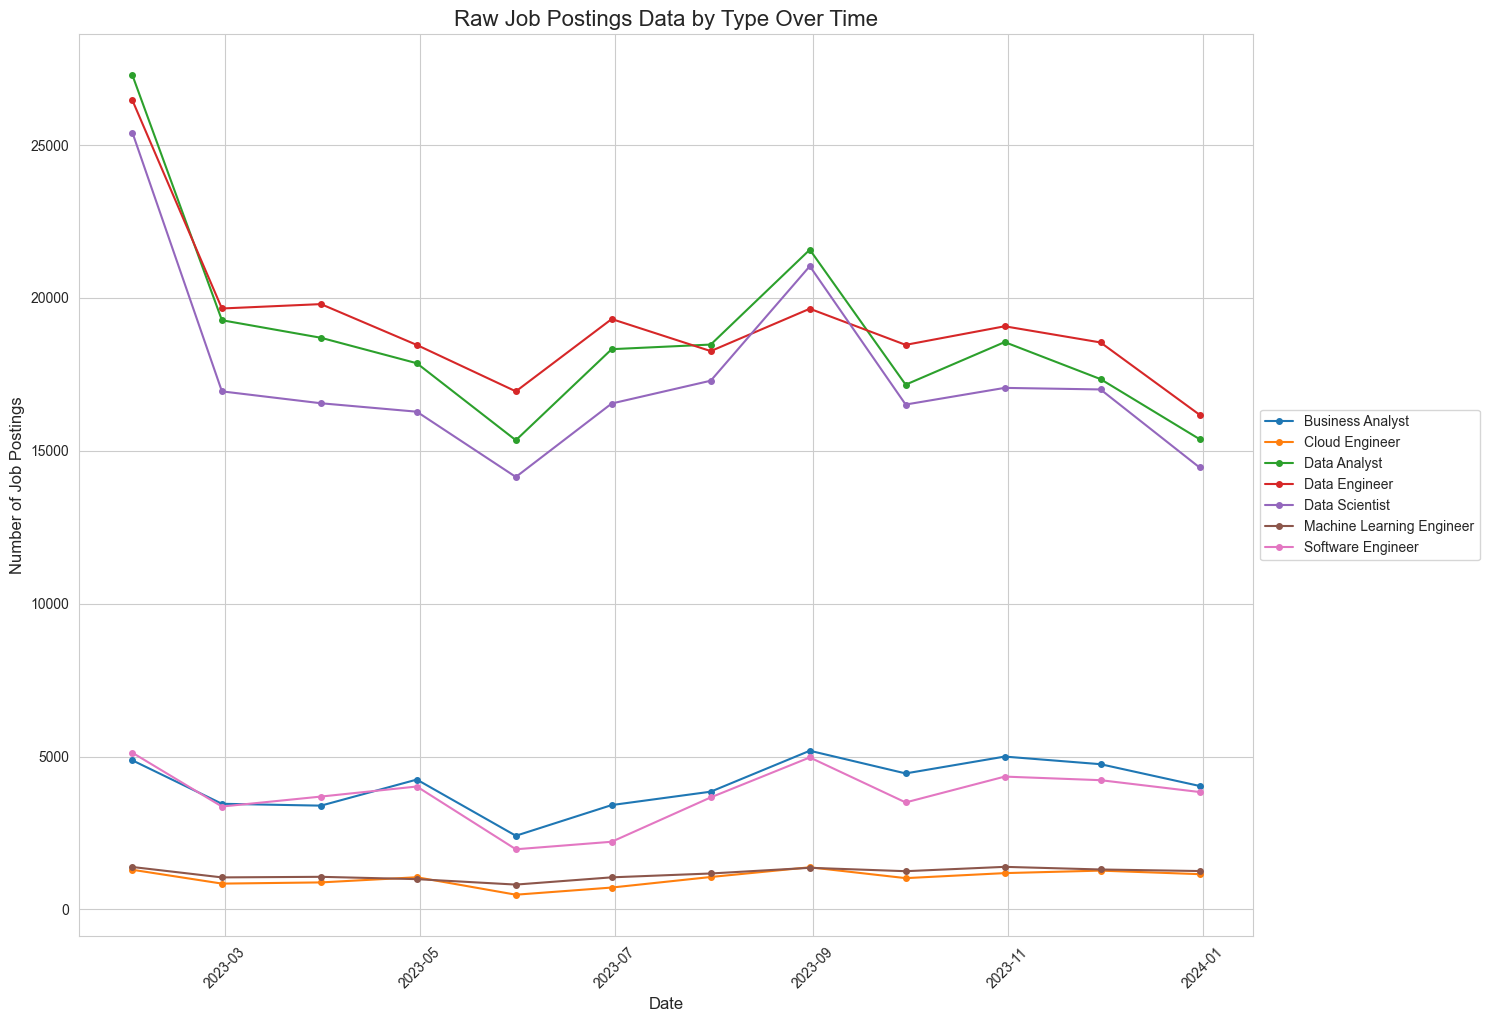

                           count          mean          std      min  \
job_title_short                                                        
Business Analyst            12.0   4088.083333   824.205674   2408.0   
Cloud Engineer              12.0   1027.416667   260.592492    480.0   
Data Analyst                12.0  18773.416667  3155.844778  15346.0   
Data Engineer               12.0  19233.166667  2524.425581  16179.0   
Data Scientist              12.0  17436.416667  3023.344279  14144.0   
Machine Learning Engineer   12.0   1173.166667   182.393597    811.0   
Software Engineer           12.0   3742.666667   943.899776   1966.0   

                                25%      50%       75%      max  
job_title_short                                                  
Business Analyst            3443.50   4141.5   4780.25   5189.0  
Cloud Engineer               872.25   1055.0   1206.50   1377.0  
Data Analyst               17299.50  18399.5  18840.50  27281.0  
Data Engineer        

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

for job_type in df_monthly.index.get_level_values(0).unique():
    job_data = df_monthly.loc[job_type]['num_jobs']
    plt.plot(job_data.index, job_data.values, 'o-', label=job_type, markersize=4)

plt.title('Raw Job Postings Data by Type Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Print basic statistics
print(df_monthly.groupby(level=0)['num_jobs'].describe())

In [ ]:
import numpy as np

def calculate_volatility(data):
    # Calculate percentage change
    pct_change = data.pct_change().dropna()
    # Calculate standard deviation of percentage changes
    volatility = np.std(pct_change)
    return volatility

volatility_results = []

for job_type in df_monthly.index.get_level_values(0).unique():
    job_data = df_monthly.loc[job_type]['num_jobs']
    volatility = calculate_volatility(job_data)
    volatility_results.append({
        'Job Type': job_type,
        'Volatility': volatility
    })

volatility_df = pd.DataFrame(volatility_results)
print("Volatility by Job Type:")
print(volatility_df.sort_values('Volatility', ascending=False))

Volatility by Job Type:
                    Job Type  Volatility
6          Software Engineer    0.318595
1             Cloud Engineer    0.316238
0           Business Analyst    0.253116
4             Data Scientist    0.154198
5  Machine Learning Engineer    0.150101
2               Data Analyst    0.142308
3              Data Engineer    0.100613


In [ ]:
def analyze_direction_changes(data):
    changes = data.diff().dropna()
    increases = (changes > 0).sum()
    decreases = (changes < 0).sum()
    no_change = (changes == 0).sum()
    total = len(changes)
    return {
        'Increases': increases,
        'Decreases': decreases,
        'No Change': no_change,
        'Percent Increases': increases / total * 100,
        'Percent Decreases': decreases / total * 100,
        'Percent No Change': no_change / total * 100
    }

direction_results = []

for job_type in df_monthly.index.get_level_values(0).unique():
    job_data = df_monthly.loc[job_type]['num_jobs']
    direction_stats = analyze_direction_changes(job_data)
    direction_results.append({
        'Job Type': job_type,
        **direction_stats
    })

direction_df = pd.DataFrame(direction_results)
print("Direction of Change Analysis:")
print(direction_df.to_string(index=False))

Direction of Change Analysis:
                 Job Type  Increases  Decreases  No Change  Percent Increases  Percent Decreases  Percent No Change
         Business Analyst          5          6          0          45.454545          54.545455                0.0
           Cloud Engineer          7          4          0          63.636364          36.363636                0.0
             Data Analyst          4          7          0          36.363636          63.636364                0.0
            Data Engineer          4          7          0          36.363636          63.636364                0.0
           Data Scientist          4          7          0          36.363636          63.636364                0.0
Machine Learning Engineer          5          6          0          45.454545          54.545455                0.0
        Software Engineer          6          5          0          54.545455          45.454545                0.0


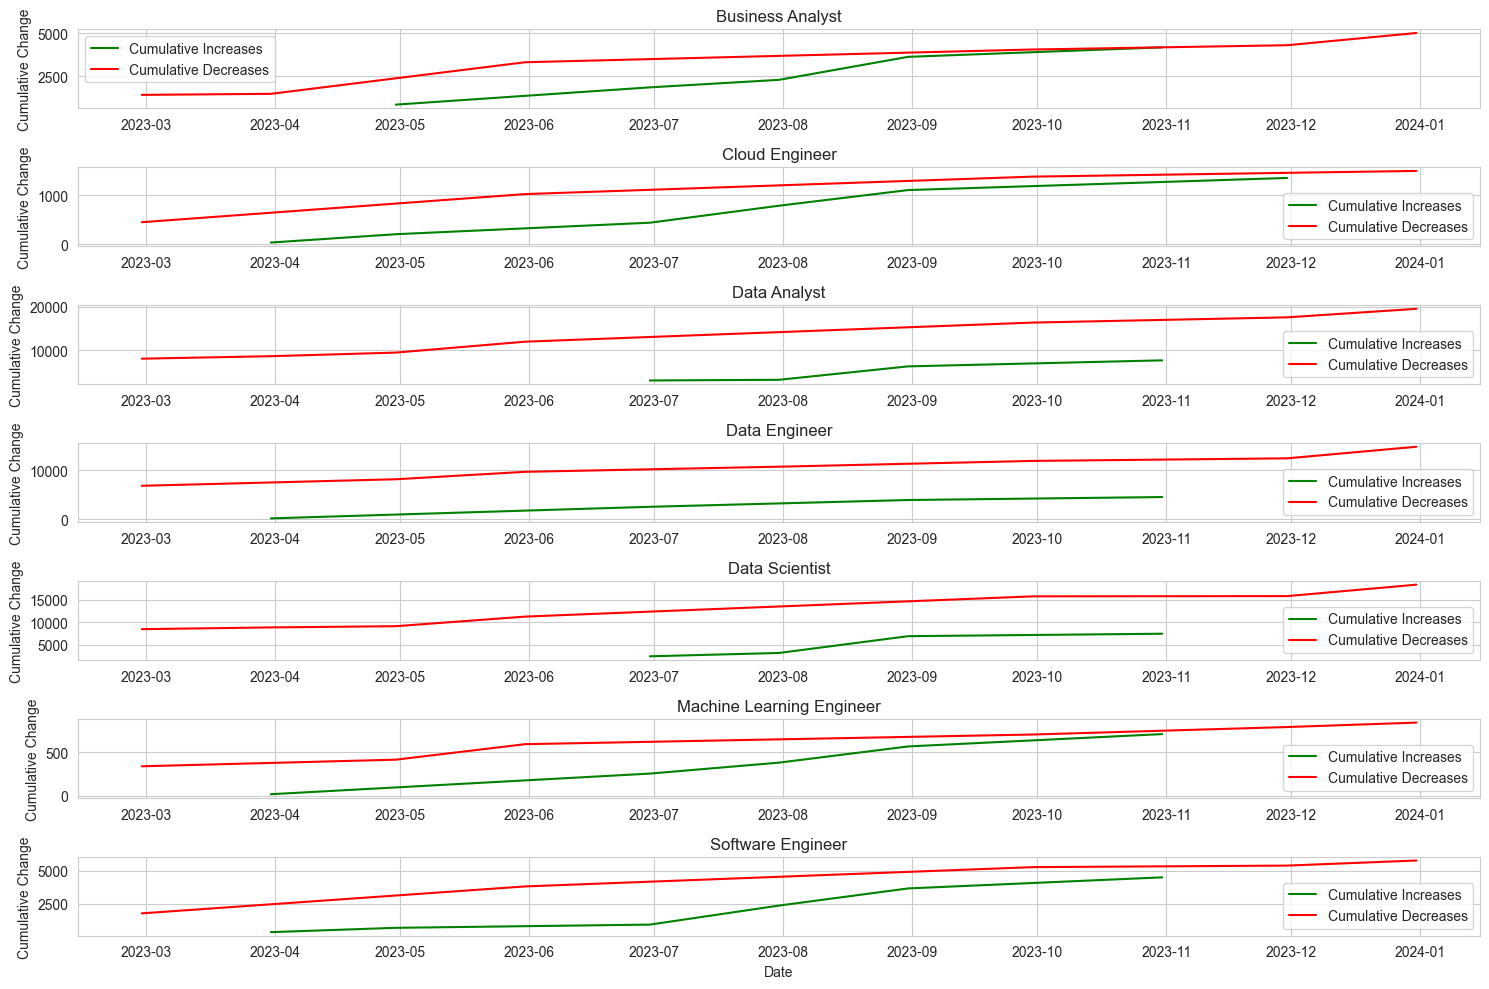

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_time_based_trends(df):
    job_types = df.index.get_level_values(0).unique()
    
    plt.figure(figsize=(15, 10))
    
    for i, job_type in enumerate(job_types, 1):
        job_data = df.loc[job_type]['num_jobs']
        changes = job_data.diff()
        
        # Calculate cumulative sum of positive and negative changes
        cumulative_increases = changes[changes > 0].cumsum()
        cumulative_decreases = changes[changes < 0].cumsum().abs()
        
        plt.subplot(len(job_types), 1, i)
        plt.plot(cumulative_increases.index, cumulative_increases.values, label='Cumulative Increases', color='green')
        plt.plot(cumulative_decreases.index, cumulative_decreases.values, label='Cumulative Decreases', color='red')
        plt.title(f'{job_type}', fontsize=12)
        plt.ylabel('Cumulative Change')
        if i == len(job_types):
            plt.xlabel('Date')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Assuming df_monthly is your original DataFrame with job posting data
analyze_time_based_trends(df_monthly)

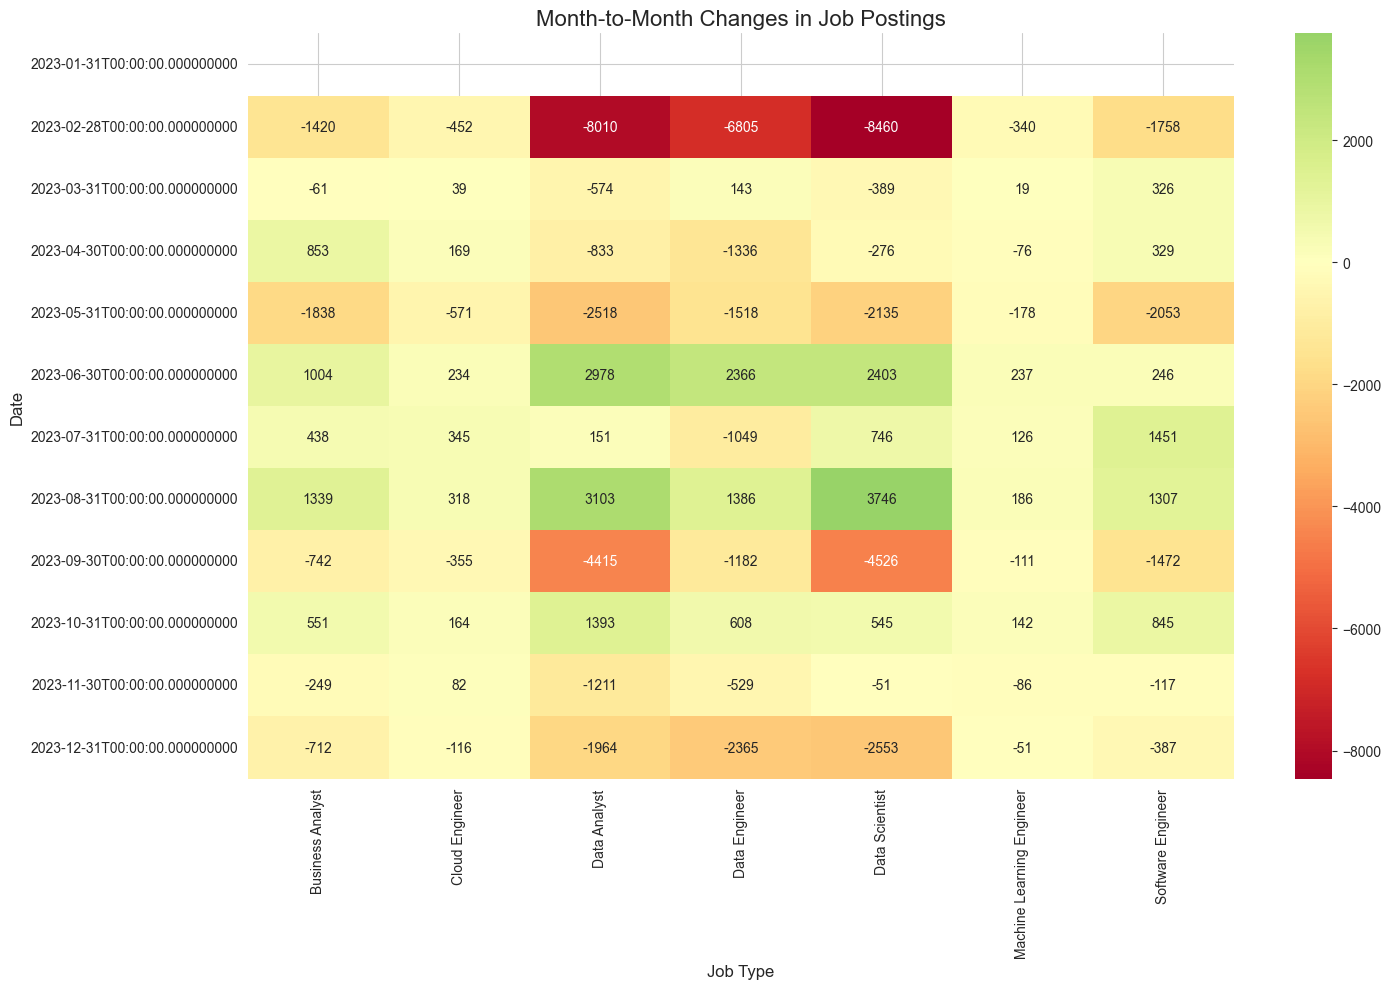

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_monthly_change_heatmap(df):
    job_types = df.index.get_level_values(0).unique()
    
    # Calculate month-to-month changes
    changes_df = df.groupby(level=0)['num_jobs'].diff().unstack(level=0)
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(changes_df, cmap='RdYlGn', center=0, annot=True, fmt='.0f')
    plt.title('Month-to-Month Changes in Job Postings', fontsize=16)
    plt.xlabel('Job Type', fontsize=12)
    plt.ylabel('Date', fontsize=12)
    plt.tight_layout()
    plt.show()

# Assuming df_monthly is your original DataFrame with job posting data
create_monthly_change_heatmap(df_monthly)

d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freque

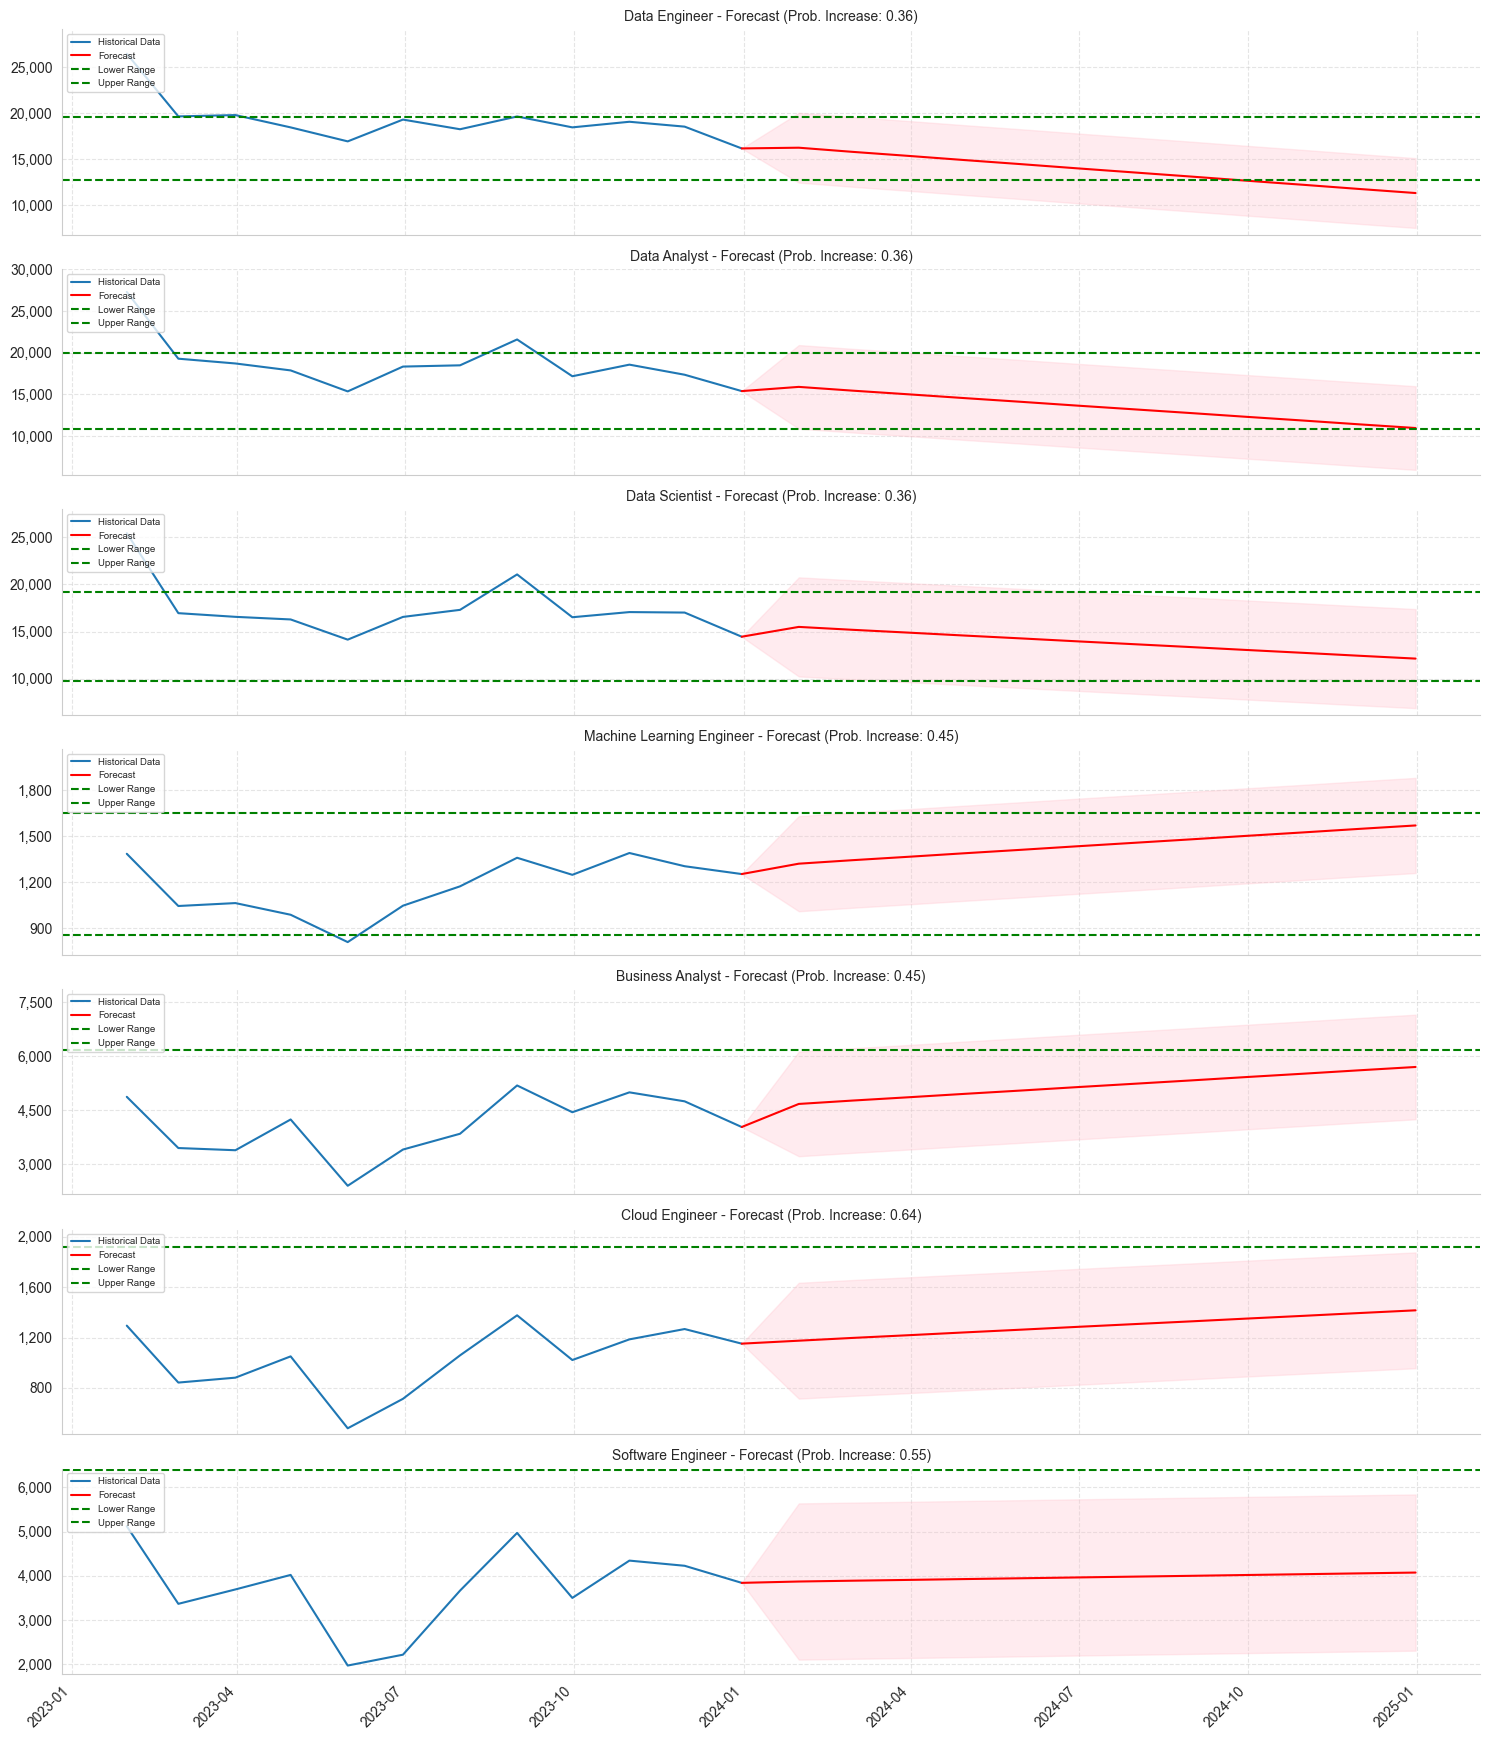


Forecast for Data Engineer:
Probability of Increase: 0.36
Range: 12764 to 19594

Monthly Forecast:
2024-01: 16257 (95% CI: 12469 to 20045)
2024-02: 15810 (95% CI: 12021 to 19598)
2024-03: 15362 (95% CI: 11574 to 19151)
2024-04: 14915 (95% CI: 11127 to 18704)
2024-05: 14468 (95% CI: 10680 to 18256)
2024-06: 14021 (95% CI: 10232 to 17809)
2024-07: 13573 (95% CI: 9785 to 17362)
2024-08: 13126 (95% CI: 9338 to 16914)
2024-09: 12679 (95% CI: 8890 to 16467)
2024-10: 12231 (95% CI: 8443 to 16020)
2024-11: 11784 (95% CI: 7996 to 15572)
2024-12: 11337 (95% CI: 7548 to 15125)

Forecast for Data Analyst:
Probability of Increase: 0.36
Range: 10790 to 19972

Monthly Forecast:
2024-01: 15887 (95% CI: 10868 to 20905)
2024-02: 15438 (95% CI: 10419 to 20457)
2024-03: 14989 (95% CI: 9971 to 20008)
2024-04: 14540 (95% CI: 9522 to 19559)
2024-05: 14091 (95% CI: 9073 to 19110)
2024-06: 13643 (95% CI: 8624 to 18661)
2024-07: 13194 (95% CI: 8175 to 18212)
2024-08: 12745 (95% CI: 7726 to 17763)
2024-09: 1229

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy import stats

# Define the desired order of job types
desired_order = [
    'Data Engineer',
    'Data Analyst',
    'Data Scientist',
    'Machine Learning Engineer',
    'Business Analyst',
    'Cloud Engineer',
    'Software Engineer'
]

# Assuming the forecast_next_12_months function remains the same as in the previous code

# Assuming df_monthly is your original DataFrame with job posting data
forecast_results = forecast_next_12_months(df_monthly)

# Reorder the forecast_results dictionary based on desired_order
reordered_forecast_results = {job_type: forecast_results[job_type] for job_type in desired_order if job_type in forecast_results}

# Visualize the results
fig, axes = plt.subplots(len(reordered_forecast_results), 1, figsize=(15, 2.5*len(reordered_forecast_results)), sharex=True)
fig.subplots_adjust(hspace=0.2)  # Slightly reduce space between subplots

for i, (job_type, result) in enumerate(reordered_forecast_results.items()):
    ax = axes[i] if len(reordered_forecast_results) > 1 else axes
    
    # Plot historical data
    historical_data = df_monthly.loc[job_type]['num_jobs']
    ax.plot(historical_data.index, historical_data.values, label='Historical Data')
    
    # Plot forecast
    forecast = result['forecast']
    conf_int = result['conf_int']
    
    # Create a seamless transition by including the last actual data point
    forecast_with_last_actual = pd.concat([historical_data.tail(1), forecast])
    conf_int_with_last_actual = pd.concat([
        pd.DataFrame({'lower': historical_data.iloc[-1], 'upper': historical_data.iloc[-1]}, index=[historical_data.index[-1]]),
        conf_int
    ])
    
    ax.plot(forecast_with_last_actual.index, forecast_with_last_actual.values, label='Forecast', color='red')
    ax.fill_between(conf_int_with_last_actual.index, 
                    conf_int_with_last_actual['lower'], 
                    conf_int_with_last_actual['upper'], 
                    color='pink', alpha=0.3)
    
    # Plot range
    ax.axhline(y=result['range'][0], color='green', linestyle='--', label='Lower Range')
    ax.axhline(y=result['range'][1], color='green', linestyle='--', label='Upper Range')
    
    ax.set_title(f'{job_type} - Forecast (Prob. Increase: {result["prob_increase"]:.2f})', fontsize=10)
    ax.legend(loc='upper left', fontsize='x-small')
    
    # Adjust y-axis limits
    all_values = np.concatenate([historical_data.values, forecast.values, 
                                 conf_int_with_last_actual['lower'].values, 
                                 conf_int_with_last_actual['upper'].values])
    y_min = max(0, np.min(all_values) * 0.9)  # Ensure y_min is not negative
    y_max = np.max(all_values) * 1.1
    ax.set_ylim(y_min, y_max)
    
    # Format y-axis labels
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Reduce number of y-ticks
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

# Print detailed forecast (this part remains the same)
for job_type, result in reordered_forecast_results.items():
    print(f"\nForecast for {job_type}:")
    print(f"Probability of Increase: {result['prob_increase']:.2f}")
    print(f"Range: {result['range'][0]:.0f} to {result['range'][1]:.0f}")
    print("\nMonthly Forecast:")
    for date, value in result['forecast'].items():
        lower, upper = result['conf_int'].loc[date]
        print(f"{date.strftime('%Y-%m')}: {value:.0f} (95% CI: {lower:.0f} to {upper:.0f})")


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }

def forecast_and_evaluate(df):
    job_types = df.index.get_level_values(0).unique()
    results = {}

    for job_type in job_types:
        job_data = df.loc[job_type]['num_jobs']
        
        # Use the last 3 months as test data
        train_data = job_data[:-3]
        test_data = job_data[-3:]
        
        # Fit the model
        model = ExponentialSmoothing(train_data, trend='add', seasonal=None)
        fit = model.fit()
        
        # Make predictions for the test period
        predictions = fit.forecast(steps=len(test_data))
        
        # Calculate metrics
        metrics = calculate_metrics(test_data, predictions)
        
        results[job_type] = metrics

    return results

# Assuming df_monthly is your original DataFrame with job posting data
evaluation_results = forecast_and_evaluate(df_monthly)

# Print the evaluation results
for job_type, metrics in evaluation_results.items():
    print(f"\nEvaluation Metrics for {job_type}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Evaluation Metrics for Business Analyst:
MSE: 366608.0754
RMSE: 605.4817
MAE: 472.3083
MAPE: 10.9750

Evaluation Metrics for Cloud Engineer:
MSE: 19298.8645
RMSE: 138.9204
MAE: 129.5780
MAPE: 10.6318

Evaluation Metrics for Data Analyst:
MSE: 4089236.9457
RMSE: 2022.1862
MAE: 1666.5353
MAPE: 10.3370

Evaluation Metrics for Data Engineer:
MSE: 1998698.1073
RMSE: 1413.7532
MAE: 955.0177
MAPE: 5.7736

Evaluation Metrics for Data Scientist:
MSE: 1342202.4133
RMSE: 1158.5346
MAE: 819.7738
MAPE: 5.4931

Evaluation Metrics for Machine Learning Engineer:
MSE: 28407.7775
RMSE: 168.5461
MAE: 133.1587
MAPE: 10.4651

Evaluation Metrics for Software Engineer:
MSE: 609041.2218
RMSE: 780.4109
MAE: 634.4687
MAPE: 15.9646


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freque

Processing Business Analyst


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Evaluation for Business Analyst:
MSE: 0.020344046642471355
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing Cloud Engineer


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Evaluation for Cloud Engineer:
MSE: 0.024075971935396432
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processing Data Analyst


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Evaluation for Data Analyst:
MSE: 0.025816971010496705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing Data Engineer


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Evaluation for Data Engineer:
MSE: 0.02179482310436046
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processing Data Scientist


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Evaluation for Data Scientist:
MSE: 0.016810879436917687
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Processing Machine Learning Engineer


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Evaluation for Machine Learning Engineer:
MSE: 0.01964659208141463
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processing Software Engineer


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Evaluation for Software Engineer:
MSE: 0.020022000337300398
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


C:\Users\reetu\AppData\Local\Temp\ipykernel_26112\14449946.py:111: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start='2024-01-01', end='2024-12-31', freq='M'), predictions, label=job_type)


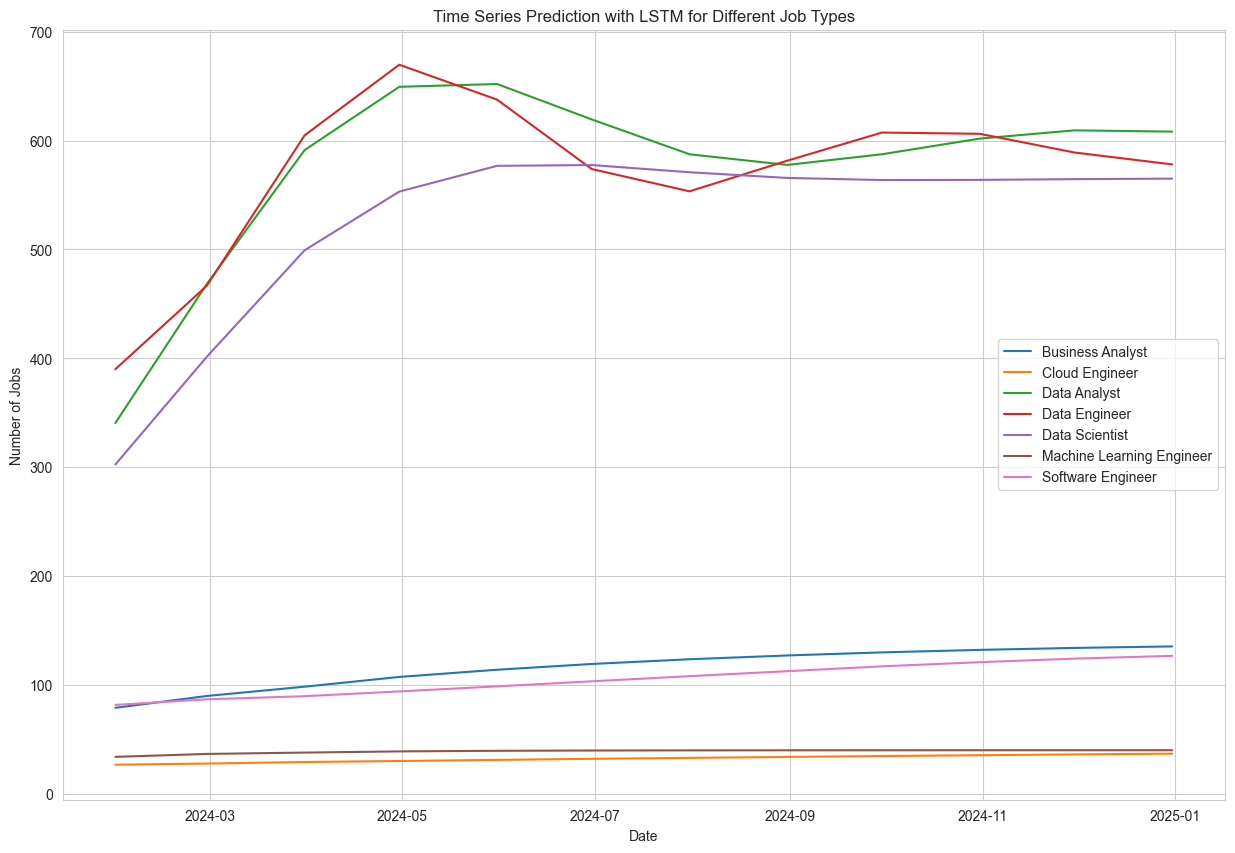


Predicted values for Business Analyst (Jan 2024 to Dec 2024):
[ 78.99603   89.88389   98.40854  107.35475  113.97056  119.26431
 123.60315  127.087166 129.9125   132.21265  134.00284  135.40408 ]

Predicted values for Cloud Engineer (Jan 2024 to Dec 2024):
[26.723444 27.801083 29.19858  30.14383  31.15073  32.14187  33.017853
 33.874687 34.689922 35.4552   36.189137 36.88818 ]

Predicted values for Data Analyst (Jan 2024 to Dec 2024):
[340.61603 468.37366 591.3292  649.436   652.0071  619.47614 587.46985
 577.6797  587.4963  601.85504 609.4526  608.2728 ]

Predicted values for Data Engineer (Jan 2024 to Dec 2024):
[390.04984 466.71826 604.91534 669.7296  637.6664  573.91296 553.43085
 581.58435 607.40906 606.2865  589.1093  578.1697 ]

Predicted values for Data Scientist (Jan 2024 to Dec 2024):
[302.49664 401.5003  499.30484 553.19885 576.84814 577.5676  570.9507
 565.7303  563.806   563.9365  564.617   565.0901 ]

Predicted values for Machine Learning Engineer (Jan 2024 to Dec 2024):

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


df_1['job_posted_date'] = pd.to_datetime(df_1['job_posted_date'])

# Set 'job_posted_date' as the index
df_1.set_index('job_posted_date', inplace=True)

# Sort by index
df_1.sort_index(inplace=True)

# Aggregate num_jobs per day for each job type
df_aggregated = df_1.groupby(['job_title_short', pd.Grouper(freq='D')])['num_jobs'].sum().reset_index()
df_aggregated.set_index(['job_title_short', 'job_posted_date'], inplace=True)

# Prepare sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Function to make predictions for the next 12 months
def predict_next_12_months(model, last_sequence, scaler):
    predictions = []
    current_sequence = last_sequence.copy().reshape(seq_length, -1)
    
    for _ in range(12):
        next_pred = model.predict(current_sequence.reshape(1, seq_length, -1))[0, 0]
        predictions.append(next_pred)
        
        # Prepare the next sequence
        next_row = np.concatenate([
            [next_pred],
            current_sequence[-1, 1:]
        ])
        current_sequence = np.vstack([current_sequence[1:], next_row])
    
    # Inverse transform the predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    
    return predictions.flatten()

# Define the sequence length
seq_length = 3
predictions_by_job_type = {}

# Define the month ranges for training and testing
train_start_date = pd.Timestamp('2023-01-01')
train_end_date = pd.Timestamp('2023-09-30')
test_start_date = pd.Timestamp('2023-10-01')
test_end_date = pd.Timestamp('2023-12-31')
full_start_date = pd.Timestamp('2023-01-01')
full_end_date = pd.Timestamp('2023-12-31')

for job_type in df_aggregated.index.get_level_values(0).unique():
    print(f"Processing {job_type}")
    
    # Filter data for the current job type
    job_data = df_aggregated.loc[job_type]
    
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(job_data[['num_jobs']])
    
    # Create sequences
    X, y = create_sequences(scaled_data, seq_length)
    
    # Split into training and testing data
    train_data = scaled_data[:len(X) - 12]  # Use the appropriate split here
    test_data = scaled_data[len(X) - 12:]  # Assuming the last 12 sequences are test data
    
    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)
    
    # Build and train the LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Evaluation for {job_type}:")
    print(f"MSE: {mse}")
    
    
    # Retrain on the entire dataset (Jan 2023 to Dec 2023)
    full_data = scaled_data
    X_full, y_full = create_sequences(full_data, seq_length)
    model.fit(X_full, y_full, epochs=100, batch_size=32, verbose=0)
    
    # Make predictions for the next 12 months
    last_sequence = full_data[-seq_length:]
    predictions = predict_next_12_months(model, last_sequence, scaler)
    
    predictions_by_job_type[job_type] = predictions

# Plot the results
plt.figure(figsize=(15, 10))
for job_type, predictions in predictions_by_job_type.items():
    plt.plot(pd.date_range(start='2024-01-01', end='2024-12-31', freq='M'), predictions, label=job_type)

plt.legend()
plt.title('Time Series Prediction with LSTM for Different Job Types')
plt.xlabel('Date')
plt.ylabel('Number of Jobs')
plt.show()

# Print predictions
for job_type, predictions in predictions_by_job_type.items():
    print(f"\nPredicted values for {job_type} (Jan 2024 to Dec 2024):")
    print(predictions)
